## Day 5

https://adventofcode.com/2021/day/5

In [2]:
def readInput5(filename):
    with open(filename) as f:
        return [ [ tuple([ int(d) for d in c.split(",")])  for c in l.strip("\n").split(" -> ") ] for l in f.readlines() ]

In [6]:
from collections import defaultdict

def line_hv(X1,X2):
    (x1,y1) = X1
    (x2,y2) = X2
    if y1==y2: # horizontal
        x1,x2 = min(x1,x2),max(x1,x2)
        return [ (x,y1) for x in range(x1,x2+1) ]
    elif x1==x2: # vertical
        y1,y2 = min(y1,y2),max(y1,y2)
        return [ (x1,y) for y in range(y1,y2+1) ]

def diag(X1,X2):
    (x1,y1) = X1
    (x2,y2) = X2
    dx = int((x2-x1)/abs(x2-x1))
    dy = int((y2-y1)/abs(y2-y1))
    return [ (x,y) for x,y in zip(range(x1,x2+dx,dx),range(y1,y2+dy,dy)) ]

def solveDay5(vents,ignoreDiagonal=True):
    diagram = defaultdict(lambda: 0)
    for X1,X2 in vents:
        (x1,y1) = X1
        (x2,y2) = X2
        cells = []
        # Part 1: only consider horizontal and vertical lines (lines where either x1 = x2 or y1 = y2)
        if x1!=x2 and y1!=y2:
            if ignoreDiagonal: 
                continue
            else:
                cells = diag(X1,X2)
        else:
            cells = line_hv(X1,X2)
        for X in cells:
            diagram[X] += 1
    return sum([ 1 if diagram[X]>1 else 0 for X in diagram.keys() ]), diagram

vents0 = readInput5("data/day05test1.txt")
vents1 = readInput5("data/input05.txt")

p10,d10 = solveDay5(vents0)
p11,d11 = solveDay5(vents1)

print("Test 1:",p10)
print("Part 1:",p11)

p20,d20 = solveDay5(vents0,ignoreDiagonal=False)
p21,d21 = solveDay5(vents1,ignoreDiagonal=False)

print("Test 2:",p20)
print("Part 2:",p21)

Test 1: 5
Part 1: 5632
Test 2: 12
Part 2: 22213


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plotDiagram(diagram):
    xmax = max([ x for x,y in diagram.keys() ])
    ymax = max([ y for x,y in diagram.keys() ])
    sea = np.zeros((ymax+1,xmax+1),dtype=int)
    for X in diagram.keys():
        x,y = X
        sea[y,x] = diagram[X]
    return sea

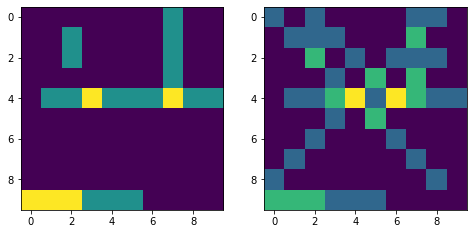

In [21]:
sea10 = plotDiagram(d10)
sea20 = plotDiagram(d20)

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(sea10)
ax[1].imshow(sea20)

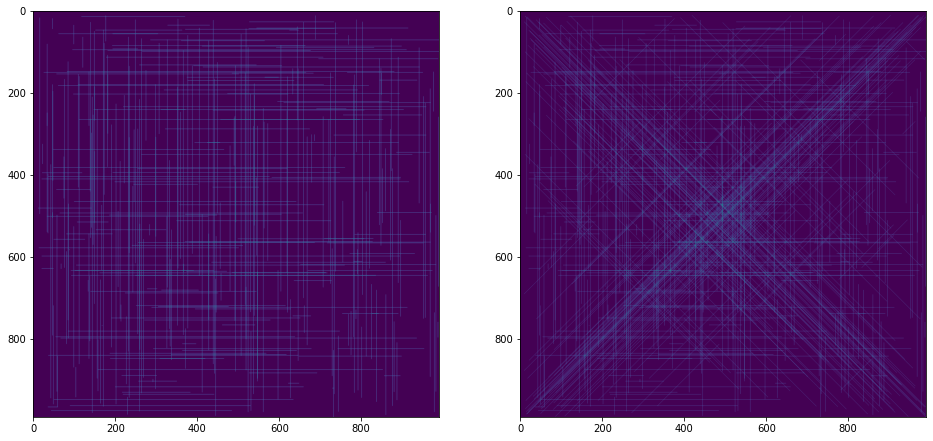

In [19]:
sea11 = plotDiagram(d11)
sea21 = plotDiagram(d21)

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(sea11)
ax[1].imshow(sea21)